In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [29]:
def plot_three_bars(d_user, d_above, d_below, dict_route_counts, n_groups, xlabel):
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(16)
    index = np.arange(n_groups)
    bar_width = 0.20
    opacity = 0.8

    rect1 = ax.bar(index, list(d_below.values()), bar_width, alpha=opacity, color='b', label='Lower grade')
    rect2 = ax.bar(index + bar_width * 2, list(d_above.values()), bar_width, alpha=opacity, color = 'r', label='Higher grade')
    rect3 = ax.bar(index + bar_width, list(d_user.values()), bar_width, alpha=opacity, color = 'g', label='Grade match')

    ax.set_ylabel("Percentage")

    ax2 = ax.twinx()
    lin1 = ax2.plot([item+bar_width for item in range(len(dict_route_counts.keys()))],
        [item for item in dict_route_counts.values()], color='C1', linewidth=3.5, label='Number of ascents')
    ax2.set_ylabel("Count")

    ax.yaxis.set_ticks(np.arange(0, 110, 20))
    ax2.yaxis.set_ticks(np.arange(0, 33000, 6000))

    ax.set_ylim([0, 100])
    ax2.set_ylim([0, 30000])

    plt.xticks(index+bar_width, d_user.keys())
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()


In [30]:
def compare_grades(df):
    
    d_user_grade = {}
    dict_route_counts = {}
    d_user_missed = {}
    d_grade_above = {}
    d_grade_below = {}

    for code in df_cd_grades['sc_scale']:
        d_user_grade[code] = 0
        dict_route_counts[code] = 0
        d_user_missed[code] = 0
        d_grade_above[code] = 0
        d_grade_below[code] = 0

    for i, row in df.iterrows():
        dict_route_counts[df_cd_grades[df_cd_grades['code'] == row['grade_id']]['sc_scale'].item()] += 1
        if row['grade_id'] == row['user_grade_id']:
            d_user_grade[df_cd_grades[df_cd_grades['code'] == row['grade_id']]['sc_scale'].item()] += 1
        elif row['user_grade_id'] != "" and row['user_grade_id'] is not None and row['grade_id'] != row['user_grade_id']:
            if df_cd_grades.index[df_cd_grades['code'] == row['user_grade_id']] == df_cd_grades.index[df_cd_grades['code'] == row['grade_id']+1] \
                or (df_cd_grades.index[df_cd_grades['code'] == row['user_grade_id']] == df_cd_grades.index[df_cd_grades['code'] == row['grade_id']+2]) \
                or df_cd_grades.index[df_cd_grades['code'] == row['user_grade_id']] == df_cd_grades.index[df_cd_grades['code'] == row['grade_id']+3]:
                    d_grade_above[df_cd_grades[df_cd_grades['code'] == row['grade_id']]['sc_scale'].item()] += 1
            elif df_cd_grades.index[df_cd_grades['code'] == row['user_grade_id']] == df_cd_grades.index[df_cd_grades['code'] == row['grade_id']-1]\
                or df_cd_grades.index[df_cd_grades['code'] == row['user_grade_id']] == df_cd_grades.index[df_cd_grades['code'] == row['grade_id']-2]\
                or df_cd_grades.index[df_cd_grades['code'] == row['user_grade_id']] == df_cd_grades.index[df_cd_grades['code'] == row['grade_id']-3]:
                    d_grade_below[df_cd_grades[df_cd_grades['code'] == row['grade_id']]['sc_scale'].item()] += 1
            d_user_missed[df_cd_grades[df_cd_grades['code'] == row['grade_id']]['sc_scale'].item()] += 1
            
    new_dict = copy.deepcopy(dict_route_counts)
    for k, v in dict_route_counts.items():
        if dict_route_counts[k] == 0:
            del new_dict[k]
            del d_user_grade[k]
            del d_grade_below[k]
            del d_grade_above[k]

        elif dict_route_counts[k] != 0 and dict_route_counts[k] >= 1:
            d_user_grade[k] = d_user_grade[k]/ dict_route_counts[k] * 100
            d_grade_below[k] = d_grade_below[k] / dict_route_counts[k] * 100
            d_grade_above[k] = d_grade_above[k] / dict_route_counts[k] * 100
    plot_three_bars(d_user_grade, d_grade_above, d_grade_below, new_dict, len(d_user_grade.keys()), 'Difficulty levels')

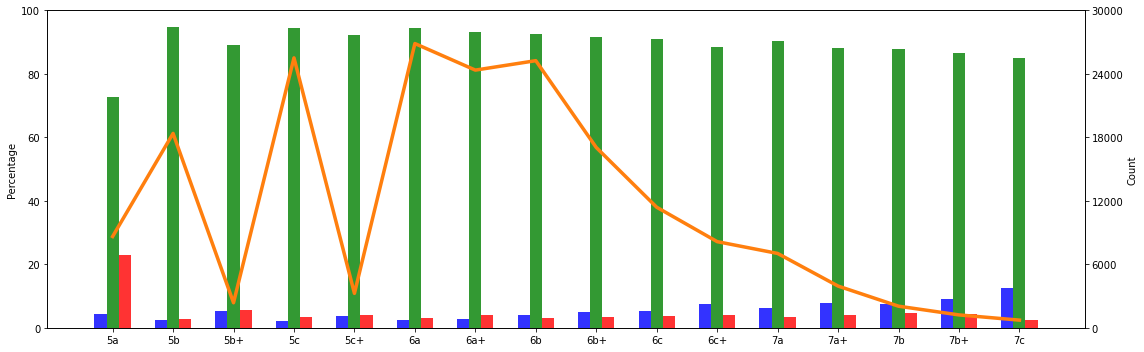

In [31]:
df_cd_grades = pd.read_csv("data/climbing_grades_mapping.csv")
data = pd.read_csv("data/gym_routes_raw.csv")
compare_grades(data)

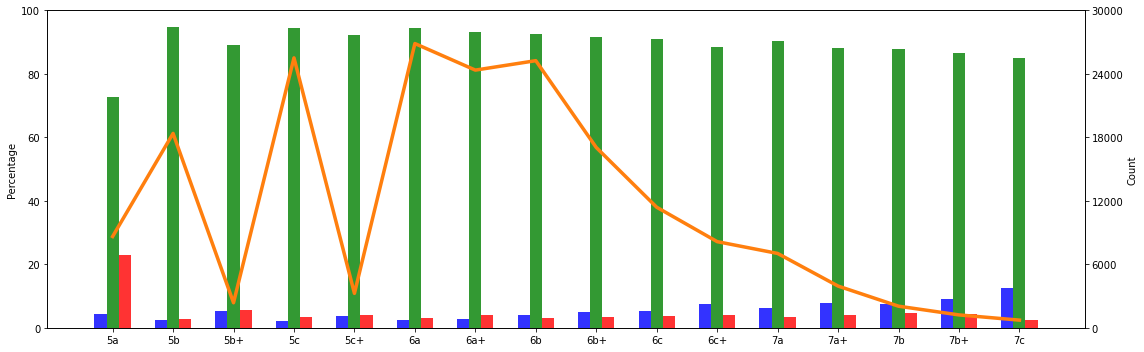

In [33]:
data = pd.read_csv("data/gym_routes_raw.csv")
compare_grades(data)